In [2]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [9]:
lambda_virus = readGenome('C:/Users/myPC/Desktop/lambda_virus.fa')

In [ ]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [10]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [52]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [54]:
naive('AC', "ATAAACGTTCTTAAACGTTGG")

[4, 14]

In [78]:
def naive_with_rc(p,t):
    
    occurences = naive(p,t)
    if p != reverseComplement(p):
        occurences.extend(naive(reverseComplement(p),t))
    
    return occurences   

In [91]:
naive_with_rc('AC', "ATAAAACGTTAGACTTAAACGTTTTCTTGG")

[5, 12, 18, 7, 20]

In [93]:
max(naive_with_rc('AC', "ATAAAACGTTAGACTTAAACGTTTTCTTGG"))

20

In [80]:
len(naive_with_rc('AGGT', lambda_virus))

306

In [81]:
list_l = naive_with_rc('AGGT', lambda_virus)
print (list_l[:10])

[122, 302, 383, 555, 729, 921, 2403, 2688, 3163, 3254]


In [85]:
lambda_virus[555:559]

'AGGT'

In [87]:
len(naive_with_rc('TTAA', lambda_virus))

195

In [88]:
len(naive('TTAA', lambda_virus))

195

In [99]:
test_list_3 = naive_with_rc('ACTAAGT', lambda_virus)
print (min(test_list_3))
print(test_list_3[0])
print(test_list_3)
lambda_virus[26028:26037]

26028
27733
[27733, 45382, 26028]


'ACTTAGTTT'

In [101]:
list_4 = naive_with_rc('AGTCGA', lambda_virus)
print(min(list_4))

450


In [110]:
#allows up to 2 mismatches per occurrence
def naive_2mm_count(p, t):
    count = 0 # initialize count variable
    for i in range(len(t)-len(p)+1):
        if HammingDistance(p, t[i:i+len(p)]) <= 2:
            count += 1
    return count
#same thing as the pattern matching before, but it is replaced by count

def HammingDistance(p, q):
    count = 0
    for i in range(len(p)):
        if p[i] != q[i]:
            count += 1
    return count

In [111]:
p = 'ACTTTA'
t = 'ACTTACTTGATAAAGT'
print(naive_2mm_count(p,t))

2


In [113]:
naive_2mm_count('TTCAAGCC', lambda_virus)

191

In [122]:
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        
        if HammingDistance(p, t[i:i+len(p)]) <= 2:  # compare characters
            occurrences.append(i)
            
        
              
    return occurrences

In [203]:
len(naive_2mm('TTCAAGCC', lambda_virus))

191

In [127]:
list_6 = naive_2mm('AGGAGGTT', lambda_virus)
print(min(list_6))

49


In [130]:
lambda_virus[49:60]

'AGGCGTTTCCG'

In [132]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [134]:
Human_reads_quiz, _ = readFastq('C:/Users/myPC/Desktop/ERR037900_1.first1000.fastq')

In [135]:
len(Human_reads_quiz)

1000

In [140]:
length_reads = []
for read in Human_reads_quiz:
    length_reads.append(len(read))
    
print (length_reads[100:200])

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]


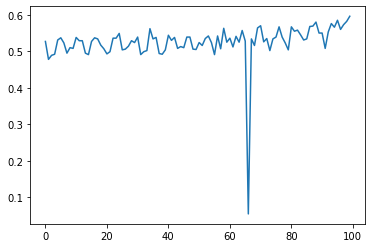

In [137]:
#def SeqCycle_poor(humanreads):
    #This function determines which sequencing cycle is poor quality, has error. Sequencing cycle corresponds to same position/offset across all reads in file
    
    #for r in humanreads:

        
def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100     #length of each read is 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

gc = findGCByPos(Human_reads_quiz)
import matplotlib.pyplot as plt
plt.plot(range(len(gc)), gc)
plt.show()

        

In [143]:
min(gc)

0.055

In [146]:
# Minimum element indices in list 
# Using list comprehension + min() + enumerate() 
temp = min(gc) 
min_indices = [i for i, j in enumerate(gc) if j == temp] 
  
# Printing result 
print("The Positions of minimum element : " + str(min_indices)) 

The Positions of minimum element : [66]


In [161]:
import bm_preproc

In [164]:
Humanchromo1 = readGenome('chr1.GRCh38.excerpt.fasta')

In [ ]:
#below functions for homework week 2

In [167]:
def naive_with_counts(p, t):
    occurrences = []
    char_comp = 0      #number of character comparisons performed
    aligns_tried = 0   #number of alignments tried
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        aligns_tried += 1
        match = True
        for j in range(len(p)):  # loop over characters
            char_comp +=1
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    
    return occurrences, aligns_tried, char_comp

In [168]:
p = 'word'
t = 'there would have been a time for such a word'
occurrences, num_alignments, num_character_comparisons = naive_with_counts(p, t)
print(occurrences, num_alignments, num_character_comparisons)

[40] 41 46


In [172]:
p = 'needle'
t = 'needle need noodle needle'
occurrences, num_alignments, num_character_comparisons = naive_with_counts(p, t)
print(occurrences, num_alignments, num_character_comparisons)

[0, 19] 20 35


In [174]:
def boyer_moore_with_counts(p, p_bm, t):
    """ Do Boyer-Moore matching. p=pattern, t=text,
        p_bm=BoyerMoore object for p """
    i = 0
    occurrences = []
    char_comp = 0      #number of character comparisons performed
    aligns_tried = 0   #number of alignments tried
    while i < len(t) - len(p) + 1:
        aligns_tried += 1
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            char_comp += 1
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return occurrences, aligns_tried, char_comp

In [188]:
from bm_preproc import BoyerMoore
p = 'word'
t = 'there would have been a time for such a word'
lowercase_alphabet = 'abcdefghijklmnopqrstuvwxyz '
p_bm = BoyerMoore(p, lowercase_alphabet)
occurrences, num_alignments, num_character_comparisons = boyer_moore_with_counts(p, p_bm, t)
print(occurrences, num_alignments, num_character_comparisons)

[40] 12 15


In [187]:
p = 'needle'
t = 'needle need noodle needle'
p_bm = BoyerMoore(p, lowercase_alphabet)
occurrences, num_alignments, num_character_comparisons = boyer_moore_with_counts(p, p_bm, t)
print(occurrences, num_alignments, num_character_comparisons)

[0, 19] 5 18


In [180]:
p1 = 'GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG'
t = Humanchromo1
occurrences, num_alignments, num_character_comparisons = naive_with_counts(p1, t)
print(occurrences, num_alignments, num_character_comparisons)

[56922] 799954 984143


In [179]:
len(occurrences)

1

In [192]:
p = 'GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG'
p_bm = BoyerMoore(p, lowercase_alphabet.upper())
occurrences, num_alignments, num_character_comparisons = boyer_moore_with_counts(p, p_bm, t)
print(occurrences, num_alignments, num_character_comparisons)

[56922] 127974 165191


In [195]:
import kmer_index

In [224]:
#function for week 2 programming homework quiz question 4 and 5
def Index_approxmatch_pigeonhole(P, T, n):
    index = kmer_index.Index(T, 8)
    all_matches = set()
    segment_len = int(round(len(P)/(n+1)))
    #index_hits_total = []
    for i in range(n+1):
        start = i*segment_len
        end = min((i+1)*segment_len, len(P))
        
        matches = index.query(P[start:end])
        print(len(matches))                   #index hit for each i, add them, would be total index hit as asked in question 5
        for m in matches:
            if m < start or m-start+len(P) > len(T):
                continue
                
            mismatches = 0
            for j in range(0, start):
                if not P[j] == T[m-start+j]:
                    mismatches+=1
                    if mismatches >n:
                        break
            for j in range(end, len(P)):
                if not P[j] == T[m-start+j]:
                    mismatches+=1
                    if mismatches >n:
                        break 
            if mismatches <= n:
                all_matches.add(m-start)
                
    return len(all_matches)    

In [225]:
P = 'GGCGCGGTGGCTCACGCCTGTAAT'
T = Humanchromo1
Index_approxmatch_pigeonhole(P, T, 2)


13
17
60


19

In [231]:
def boyer_moore(p, p_bm, t):
    """ Do Boyer-Moore matching """
    i = 0
    occurrences = []
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return occurrences

p_bm = BoyerMoore(P, alphabet = "ACGT")

In [233]:
len(boyer_moore(P, p_bm, T))

5

In [499]:
def approximate_match(p, t, n):                         #apporx match boyer Moore with pigeonhole
    segment_length = int(round(len(p) / (n+1)))
    all_matches = set()
    for i in range(n+1):
        start = i*segment_length
        end = min((i+1)*segment_length, len(p))
        p_bm = BoyerMoore(p[start:end], alphabet='ACGT')
        matches = boyer_moore(p[start:end], p_bm, t)
        # Extend matching segments to see if whole p matches
        print(len(matches))
        for m in matches:
            if m < start or m-start+len(p) > len(t):
                continue
            mismatches = 0
            for j in range(0, start):
                if not p[j] == t[m-start+j]:
                    mismatches += 1
                    if mismatches > n:
                        break
            for j in range(end, len(p)):
                if not p[j] == t[m-start+j]:
                    mismatches += 1
                    if mismatches > n:
                        break
            if mismatches <= n:
                all_matches.add(m - start)
    return len(all_matches)

In [500]:
approximate_match(P, T, 2) 

13
17
60


19

In [693]:
import bisect
   
class SubseqIndex(object):
    """ Holds a subsequence index for a text T """
    
    def __init__(self, t, k, ival):
        """ Create index from all subsequences consisting of k characters
            spaced ival positions apart.  E.g., SubseqIndex("ATAT", 2, 2)
            extracts ("AA", 0) and ("TT", 1). """
        self.k = k  # num characters per subsequence extracted
        self.ival = ival  # space between them; 1=adjacent, 2=every other, etc
        self.index = []
        self.span = 1 + ival * (k - 1)
        for i in range(len(t) - self.span + 1):  # for each subseq
            self.index.append((t[i:i+self.span:ival], i))  # add (subseq, offset)
        self.index.sort()  # alphabetize by subseq
    
    def query(self, p):
        """ Return index hits for first subseq of p """
        subseq = p[:self.span:self.ival]  # query with first subseq
        i = bisect.bisect_left(self.index, (subseq, -1))  # binary search
        hits = []
        
        while i < len(self.index):  # collect matching index entries
            
            if self.index[i][0] != subseq:
                break
            hits.append(self.index[i][1])
            i += 1
        return hits

In [655]:
t2 = 'to-morrow and to-morrow and to-morrow creeps in this petty pace'
p2 = 'to-morrow and to-morrow '
subseq_ind2 = SubseqIndex(t2, 8, 3)
#print(subseq_ind.index)
#print(subseq_ind.query(p[2:]))


In [656]:
offsets2, num_index_hits2 = querySeqIndex(p2, t2, subseq_ind2)

In [657]:
print(offsets2, num_index_hits2)

[0] 4


In [703]:
t1 = open('1110.txt').read()
p1 = 'English measure backward'
subseq_ind1 = SubseqIndex(t1, 8, 3) 
offsets1, num_index_hits1 = querySeqIndex(p1, t1, subseq_ind1)

In [704]:
print(offset1, num_index_hits1)

NameError: name 'offset1' is not defined

In [663]:
P = 'GGCGCGGTGGCTCACGCCTGTAAT'
T = Humanchromo1
subseq_ind4 = SubseqIndex(T, 8, 3) 
offsets3, num_index_hits3 = querySeqIndex(P, T, subseq_ind4)

In [664]:
print(offsets3, num_index_hits3)

[] 4


In [726]:
#function for week 2 programming homework quiz question 6, subsequence index (haven't done 2 mismatch thing here)

def querySeqIndex(p, t, index):
    k = index.k
    ival = index.ival
    count = []
    offsets = []
    i=0
    #matches = index.query(p)
    for x in range(ival):

        for i in index.query(p[x:]):
            count.append(i)
            if p[k:] == t[x+i+k:x+i+len(p)]:  # verify that rest of P matches
                offsets.append(i)
    
    return offsets, count  

In [727]:
t2 = 'to-morrow and to-morrow and to-morrow creeps in this petty pace'
p2 = 'to-morrow and to-morrow '
subseq_ind2 = SubseqIndex(t2, 8, 3)

In [728]:
offsets, num_index_hits2 = querySeqIndex(p2, t2, subseq_ind2)

In [729]:
print(offsets, len(num_index_hits2))

[0, 14] 6


In [730]:
t1 = open('1110.txt').read()
p1 = 'English measure backward'
subseq_ind1 = SubseqIndex(t1, 8, 3) 
offsets, num_index_hits = querySeqIndex(p1, t1, subseq_ind1)

In [733]:
print(offsets, len(num_index_hits))

[132573] 3


In [734]:
P = 'GGCGCGGTGGCTCACGCCTGTAAT'
T = Humanchromo1
subseq_ind = SubseqIndex(T, 8, 3) 
offsets, num_index_hits = querySeqIndex(P, T, subseq_ind)

In [736]:
print(offsets,len(num_index_hits))

[56922, 262042, 273669, 364263, 465647, 657496, 717706] 79


In [1016]:
#Week 3 Programming homework q1&2, first row of matrix is set to 0 initially, so edited the editDistance function accordingly
def editDistance_approxmatch(P, T):
    # Create distance matrix
    D = []
    for i in range(len(P)+1):
        D.append([0]*(len(T)+1))
    # Initialize first row and column of matrix
    for i in range(len(P)+1):
        D[i][0] = i
    for i in range(len(T)+1):
        D[0][i] = 0
    # Fill in the rest of the matrix
    for i in range(1, len(P)+1):
        for j in range(1, len(T)+1):
            distHor = D[i][j-1] + 1
            distVer = D[i-1][j] + 1
            if P[i-1] == T[j-1]:
                distDiag = D[i-1][j-1]
            else:
                distDiag = D[i-1][j-1] + 1
            D[i][j] = min(distHor, distVer, distDiag)
    # Edit distance for min element in the last row of matrix
    min_lastrow = min(D[len(P)][j] for j in range(len(T)+1))
    
    return min_lastrow

In [753]:
P = 'GCGTATGC' 
T = 'TATTGGCTATACGGTT'
editDistance_approxmatch(P,T)

2

In [754]:
x = 'shake spea'
y = 'Shakespear'
editDistance_approxmatch(x,y)

2

In [757]:
P = 'GCTGATCGATCGTACG'
T= Humanchromo1
editDistance_approxmatch(P,T)

3

In [1017]:
P1 = 'GATTTACCAGATTGAG'
T= Humanchromo1
editDistance_approxmatch(P1,T)

2

In [947]:
#Programmin homework week 3, Q3, this function is too slow for a long data with many reads, write a faster function
#Say we are concerned only with overlaps that 
#(a) are exact matches (no differences allowed), and (b) are at least k bases long. To make an overlap graph, we could call overlap(a, b, min_length=k) this function on every possible pair of reads from the dataset.  Unfortunately, that will be very slow!
def overlap(a, b, min_length):
    """ Return length of longest suffix of 'a' matching
        a prefix of 'b' that is at least 'min_length'
        characters long.  If no such overlap exists,
        return 0. """
    start = 0  # start all the way at the left
    while True:
        start = a.find(b[:min_length], start)  # look for b's prefix in a
        if start == -1:  # no more occurrences to right
            return 0
        # found occurrence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1  # move just past previous match

In [765]:
PhiX_FASTQ, _ = readFastq('ERR266411_1.for_asm.fastq')

In [766]:
print(len(PhiX_FASTQ[0]))

100


In [1066]:
#got it to about 8 seconds (check faster code givrn below this one, uses a another dictionary)
def overlap_modified(reads, min_length):
    
    kmer_reads = {}
    
    r_suffix = set()
    final_reads = set()
    
    for r in reads:
        index = kmer_index.Index(r, min_length)
        for i in range(len(index.index)):
            if index.index[i][0] not in kmer_reads:
                kmer_reads[index.index[i][0]] = set([r])
            else:
                kmer_reads[index.index[i][0]].update([r])
    
    #return kmer_reads.keys()
    #(2) Now, for each read a, we find all overlaps involving a suffix of a.
    #we take a's length-k (min_length) suffix, find all reads containing that k-mer
    
    for r in reads:
                
        read_list = list(kmer_reads.get(r[len(r)-min_length : len(r)]))
              
        if len(read_list) > 1:
        
            for i in range(len(read_list)):
                if read_list[i] != r:                                        
                    overlap_result = overlap(r, read_list[i], min_length)
                                                
                    if overlap_result > 0:
                        #(r, read_list[i])   #tuple with pair of reads
                                #print(reads_pair)
                        final_reads.update([(r, read_list[i])])
                        r_suffix.update([r])         
           
    return final_reads, r_suffix
    

In [1069]:
reads = ['CGTACG', 'TACGTA', 'GTACGT', 'ACGTAC', 'GTACGA', 'TACGAT']
f, r = overlap_modified(reads, 4)
print(len(f), len(r))

12 5


In [1071]:
%%time
f, r = overlap_modified(PhiX_FASTQ, 30)
print(len(f), len(r))

904746 7161
Wall time: 8.55 s


In [1073]:
#copied incomplete code from forum, modified it to give answers required, a bit faster
from collections import *
def Correct_overlap_all_pairs(reads, min_length):
    
    #kmer_dict = createKmersFromReadS(reads, min_length) #create dict with kmer key/and set of reads with that kmer value. User has to create this function
    kmer_dict = {}
    #r_suffix = list()
    #final_reads = set()
    #read_suffix = set()    
    for r in reads:
        index = kmer_index.Index(r, min_length)
        for i in range(len(index.index)):
            if index.index[i][0] not in kmer_dict:
                kmer_dict[index.index[i][0]] = set([r])
            else:
                kmer_dict[index.index[i][0]].update([r])
    
    overlap_graph = defaultdict(set) #read is key, set of overlapping reads are value
    val_list_total = []
    
    for read in reads:
        #create suffix for this read
        read_suffix = read[-min_length: ]
        
        
        #extract set of all reads containing this kmer/suffix
        read_set = kmer_dict[read_suffix].copy()
        
        assert(len(read_set) > 0) # check that the set isnt empty
        
        read_set.remove(read) #remove the read so we dont compare it with itself
        

        #THIS WORKS
        for compar_read in read_set:
            if overlap(read, compar_read, min_length) > 0:
                overlap_graph[read].add(compar_read)
         
        val_list_total.append(len(overlap_graph[read]))
    
    total_edges = 0
    for i in val_list_total:
        total_edges += i
    
    total_nodes_withasuffix = 0
    for i in val_list_total:
        if i != 0:
            total_nodes_withasuffix += 1
        
            
        
    
    return total_edges, total_nodes_withasuffix       
        

In [1058]:
reads = ['CGTACG', 'TACGTA', 'GTACGT', 'ACGTAC', 'GTACGA', 'TACGAT']
Correct_overlap_all_pairs(reads, 4)

(12, 5)

In [1074]:
%%time
Correct_overlap_all_pairs(PhiX_FASTQ, 30)

Wall time: 6.83 s


(904746, 7161)

In [1118]:
#Week 4 programming homework
def overlap(a, b, min_length=3):
    """ Return length of longest suffix of 'a' matching
        a prefix of 'b' that is at least 'min_length'
        characters long.  If no such overlap exists,
        return 0. """
    start = 0  # start all the way at the left
    while True:
        start = a.find(b[:min_length], start)  # look for b's suffx in a
        if start == -1:  # no more occurrences to right
            return 0
        # found occurrence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1  # move just past previous match

import itertools

def scs(ss):
    """ Returns shortest common superstring of given
        strings, which must be the same length """
    scs_set = set()
    shortest_sup = None
    for ssperm in itertools.permutations(ss):
        sup = ssperm[0]  # superstring starts as first string
        for i in range(len(ss)-1):
            # overlap adjacent strings A and B in the permutation
            olen = overlap(ssperm[i], ssperm[i+1], min_length=1)
            # add non-overlapping portion of B to superstring
            sup += ssperm[i+1][olen:]
        if shortest_sup is None or len(sup) <= len(shortest_sup):
            shortest_sup = sup  # found shorter superstring
            scs_set.update([shortest_sup])    #set of shorties
    
    len_ssc = []   #list of lengths of scs in scs_set
    for i in scs_set:
        len_ssc.append(len(i))
    
    shortest_set = set()       #set of multiple scs with shortest length
    len_min = min(len_ssc)
    print(len_min)
    for i in scs_set:
        if len(i) == len_min:
           shortest_set.update([i]) 
    
    return shortest_set  # return shortest

In [1119]:
ss = ['CCT', 'CTT', 'TGC', 'TGG', 'GAT', 'ATT']
print(scs(ss))

11
{'CCTTGGATTGC', 'TGGATTGCCTT', 'TGCCTTGGATT', 'GATTGCCTTGG'}


In [1120]:
strings = ['ABC', 'BCA', 'CAB']
scs(strings)

5


{'ABCAB', 'BCABC', 'CABCA'}

In [1121]:
strings = ['GAT', 'TAG', 'TCG', 'TGC', 'AAT', 'ATA']
scs(strings)

12


{'AATAGATCGTGC',
 'AATAGATGCTCG',
 'AATAGTCGATGC',
 'AATCGATAGTGC',
 'AATGCTCGATAG',
 'TCGAATAGATGC',
 'TCGATAGAATGC',
 'TCGATGCAATAG',
 'TGCAATAGATCG',
 'TGCAATCGATAG'}

In [1123]:
mystery_virus, _ = readFastq('ads1_week4_reads.fq')

In [1148]:
def pick_maximal_overlap(reads, k):
    """ Return a pair of reads from the list with a
        maximal suffix/prefix overlap >= k.  Returns
        overlap length 0 if there are no such overlaps."""
    reada, readb = None, None
    best_olen = 0
    for a, b in itertools.permutations(reads, 2):
        olen = overlap(a, b, min_length=k)
        if olen > best_olen:
            reada, readb = a, b
            best_olen = olen
    return reada, readb, best_olen

In [1188]:
def max_overlap_all_pairs(reads, min_length):
    #kmer_dict = createKmersFromReadS(reads, min_length) #create dict with kmer key/and set of reads with that kmer value. User has to create this function
    kmer_dict = {}
    for r in reads:
        index = kmer_index.Index(r, min_length)
        for i in range(len(index.index)):
            if index.index[i][0] not in kmer_dict:
                kmer_dict[index.index[i][0]] = set([r])
            else:
                kmer_dict[index.index[i][0]].update([r])
    
    #max_overlap_graph = defaultdict(set) #read is key, tupple(set max overlapping read, length of max ovelap) is value
    #val_list_tupple = []
    olen = 0
    best_olen = 0
    read_a, read_b = None, None
    for read in reads:
        #create suffix for this read
        read_suffix = read[-min_length: ]
        #extract set of all reads containing this kmer/suffix
        read_set = kmer_dict[read_suffix].copy()
        assert(len(read_set) > 0) # check that the set isnt empty
        read_set.remove(read) #remove the read so we dont compare it with itself
        
        #THIS WORKS
        for compar_read in read_set:
            olen = overlap(read, compar_read, min_length)
            if olen > best_olen:
                read_a, read_b = read, compar_read
                best_olen = olen
    
    return read_a, read_b, best_olen
         
    """"           
                #max_overlap_graph[read].add(compar_read)
                #best_olen = olen
        #val_list_tupple.append(overlap_graph[read])

    total_edges = 0
    for i in val_list_total:
        total_edges += i
    
    total_nodes_withasuffix = 0
    for i in val_list_total:
        if i != 0:
            total_nodes_withasuffix += 1
   
    return max_overlap_graph, best_olen 
     """

In [1193]:
reads = ['CGTACG', 'TACGTA', 'GTACGT', 'ACGTAC', 'GTACGA', 'TACGAT']
max_overlap_all_pairs(reads, 4)

('CGTACG', 'GTACGA', 5)

In [1195]:
#week 4 question 3, assemble given reads using greedy shortest common superstring

def greedy_scs(reads, k):
    """ Greedy shortest-common-superstring merge.
        Repeat until no edges (overlaps of length >= k, min_length)
        remain. """
    read_a, read_b, olen = max_overlap_all_pairs(reads, k)
    
    while  olen> 0:
        reads.remove(read_a)
        reads.remove(read_b)
        reads.append(read_a + read_b[olen:])
        read_a, read_b, olen = max_overlap_all_pairs(reads, k)
    return ''.join(reads)

In [1197]:
greedy_scs(['ABC', 'BCA', 'CAB'], 2)

'CABCA'

In [1199]:
greedy_scs(['ABCD', 'CDBC', 'BCDA'], 1)

'CDBCABCDA'

In [1200]:
scs(['ABCD', 'CDBC', 'BCDA'])

8


{'ABCDBCDA'}

In [1225]:
%%time
assembly = greedy_scs(mystery_virus, 30)

Wall time: 53 ms


In [1226]:
len(assembly)

15894

In [1227]:
assembly[0:10]

'ACCAAACAAA'

In [1228]:
count_a = 0
count_t = 0
for base in assembly:
    if base == 'A':
        count_a += 1
    elif base == 'T':
        count_t += 1

print(count_a, count_t)        

4633 3723


In [1210]:
with open('mystry_virus.txt', 'w') as f:            #creating a file mystry_virus and saving the string 'assembly' that we got from above code
    f.writelines(assembly)